 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [162]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [163]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path)
# Set the date as the index
whale_df = whale_df.set_index(pd.to_datetime(whale_df["Date"], infer_datetime_format=True))
# Drop the extra Date column
whale_df = whale_df.drop(columns=["Date"])
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [164]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [165]:
# Drop nulls
whale_df = whale_df.dropna().copy()
# Check nulls have been dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [166]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path)
# Set the date as the index
algo_df = algo_df.set_index(pd.to_datetime(algo_df["Date"], infer_datetime_format=True))
# Drop the extra date column
algo_df = algo_df.drop(columns=["Date"])
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [171]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [168]:
# Drop nulls
algo_df = algo_df.dropna().copy()
# Check the nulls have been dropped
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [169]:
# Reading S&P 500 Closing Prices - (I asked BCS if we could use S&P500 instead of S&P TSX as the instruction states and they said yes)
SP500_path = Path("Resources/sp500_history.csv")
SP500_df = pd.read_csv(SP500_path)
# Set the date as the index
SP500_df = SP500_df.set_index(pd.to_datetime(SP500_df["Date"], infer_datetime_format=True))
# Drop the extra date column
SP500_df = SP500_df.drop(columns=["Date"])
SP500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [170]:
# Check Data Types to see if they need to be amended.
SP500_df.dtypes

Close    object
dtype: object

In [161]:
# Fix Data Types - firstly replace the "$" with " ".
SP500_df["Close"] = SP500_df["Close"].str.replace("$","",regex=False)
# Set the data type to float.
SP500_df["Close"] = SP500_df["Close"].astype('float')
SP500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
SP500_daily_returns = SP500_df.pct_change()
SP500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
# First count the nulls
SP500_daily_returns.isnull().sum()

Close    1
dtype: int64

In [111]:
# Then drop the nulls
SP500_daily_returns.dropna(inplace=True)
SP500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [14]:
# Check nulls have been dropped
SP500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["S&P 500"]
SP500_daily_returns.columns = columns
SP500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [112]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, SP500_daily_returns], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of all portfolios'}, xlabel='Date', ylabel='Returns as decimal'>

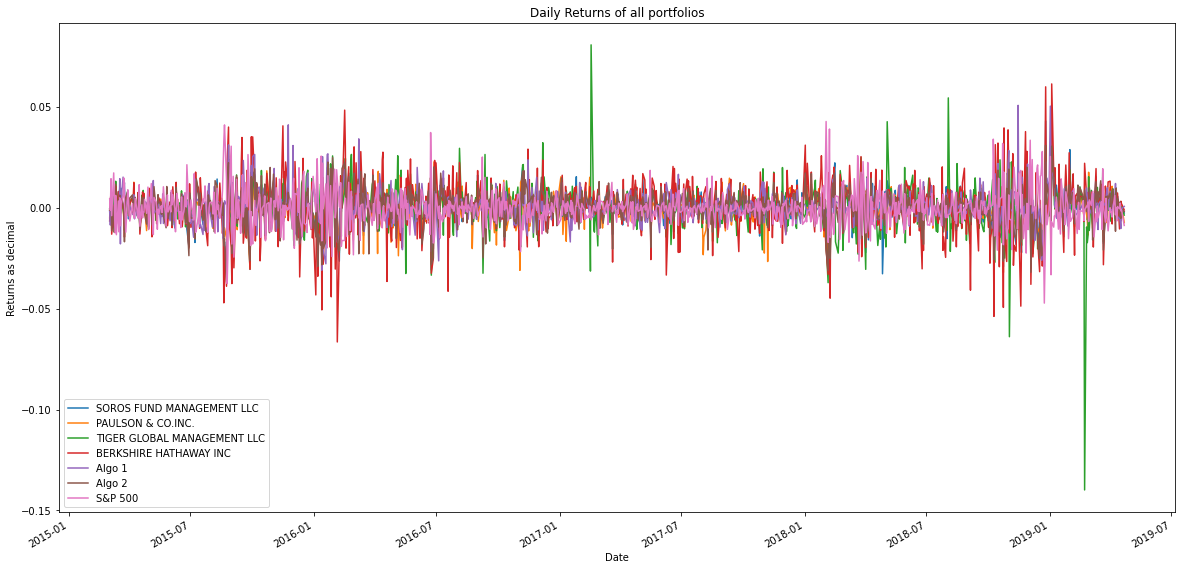

In [114]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10),title='Daily Returns of all portfolios',ylabel='Returns as decimal')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Culmulative returns of all portfolios'}, xlabel='Date', ylabel='Returns as decimal'>

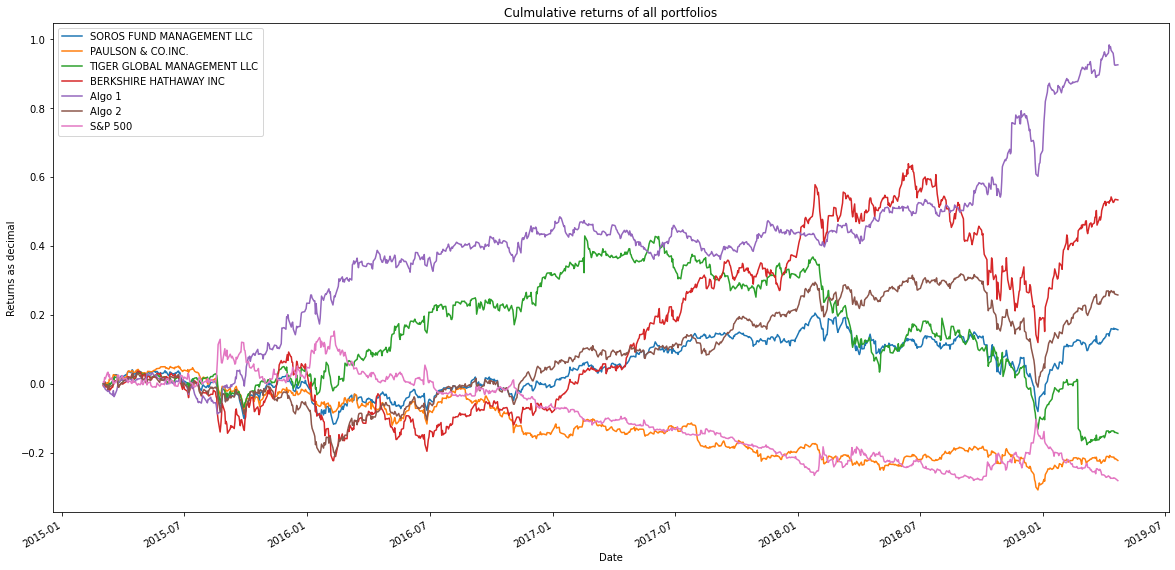

In [115]:
# Calculate cumulative returns of all portfolios
combined_cumulative_returns = (1 + combined_df).cumprod() - 1

# Plot cumulative returns
combined_cumulative_returns.plot(figsize=(20,10),title='Culmulative returns of all portfolios',ylabel='Returns as decimal')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box Plot of daily returns of all portfolios'}, ylabel='Daily Returns as decimal'>

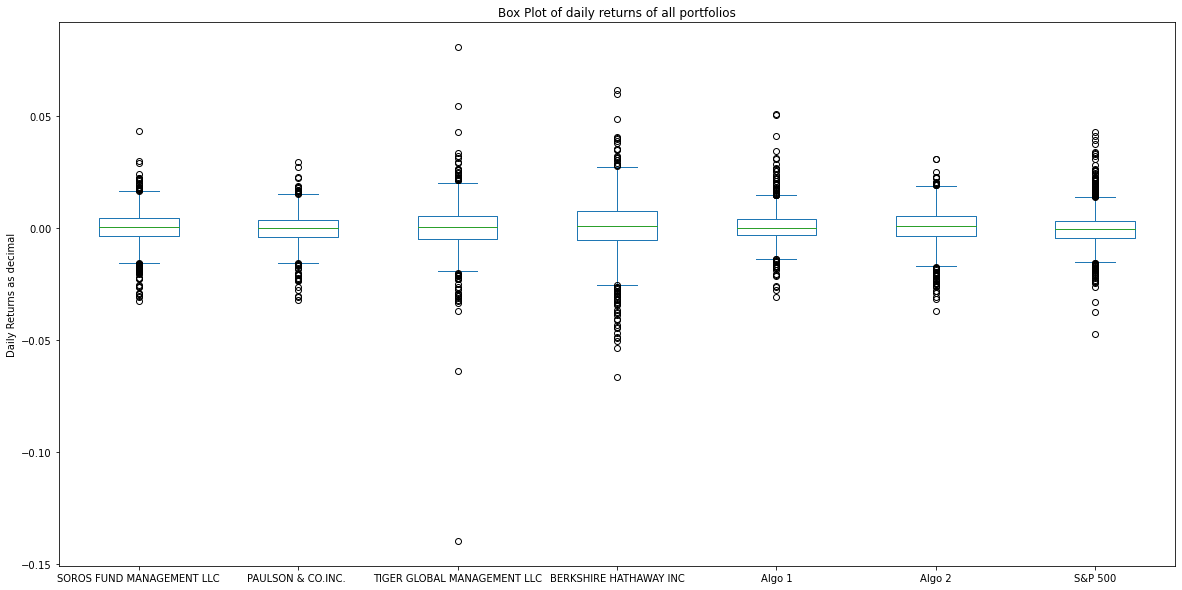

In [116]:
# Box plot to visually show risk
combined_df.plot(figsize=(20,10),kind="box",xlabel='Portfolio',ylabel='Daily Returns as decimal',title='Box Plot of daily returns of all portfolios')

### Calculate Standard Deviations

In [97]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = combined_df.std()
combined_df_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [127]:
# Calculate the daily standard deviation of S&P 500
SP500_std = combined_df_std['S&P 500']
SP500_std

0.00858688974707399

In [143]:
# Determine which portfolios are riskier than the S&P 500
for number in combined_df_std:
    if number > 0.008587:
        print(f"The portfolio with a std of {number} is more riskier than the S&P500")
        
print("These portfolios are Birkshire Hathaway Inc and Tiger Global Management LLC respectively")

The portfolio with a std of 0.010897305414583355 is more riskier than the S&P500
The portfolio with a std of 0.012918753062201797 is more riskier than the S&P500
These portfolios are Birkshire Hathaway Inc and Tiger Global Management LLC respectively


### Calculate the Annualized Standard Deviation

In [179]:
# Calculate the annualized standard deviation (252 trading days) 
# As previous question is to determine standard deviation of S&P 500, I assumed this question is related to S&P500. 
# I have also calculated the annualised STD of each below too
SP500_annualised_std = SP500_std * np.sqrt(252)
SP500_annualised_std

0.1363126488377286

In [180]:
# Annualised standard deviation of each of the portfolio
combined_annualised_std = combined_df_std * np.sqrt(252)
combined_annualised_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-day standard deviation of all portfolios'}, xlabel='Date'>

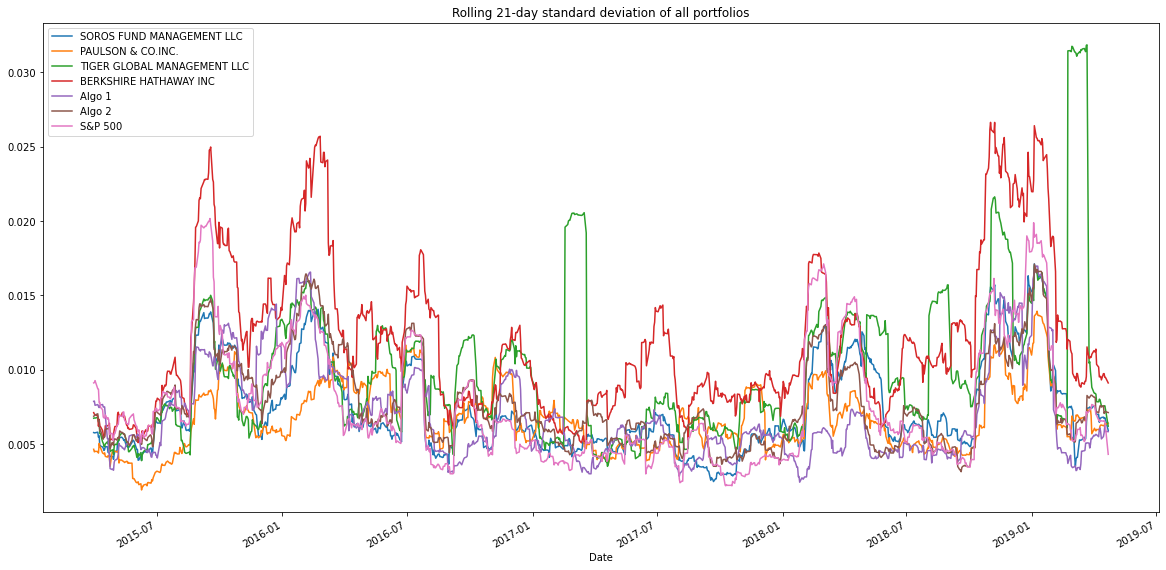

In [181]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_rolling_std.plot(figsize=(20,10),title='Rolling 21-day standard deviation of all portfolios')

### Calculate and plot the correlation

In [182]:
# Calculate the correlation using corr
correlation = combined_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

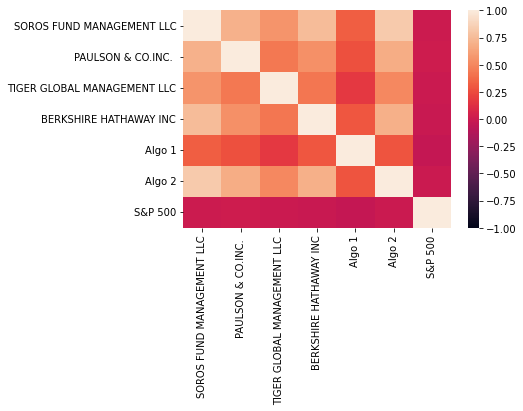

In [183]:
# Using Seaborn Heatmap to visualise correlation
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [184]:
# Calculate covariance of a single portfolio using cov
algo1_covariance = combined_df['Algo 1'].cov(combined_df['S&P 500'])
algo1_covariance

-2.2230425517155125e-06

In [185]:
# Calculate variance of S&P 500 using var
SP500_variance = combined_df['S&P 500'].var()
SP500_variance

7.373467552840441e-05

In [186]:
# Computing beta
algo1_beta = algo1_covariance / SP500_variance
algo1_beta

-0.03014921454233757

<AxesSubplot:title={'center':'Rolling 60-Day rolling covariance of Algo 1'}, xlabel='Date'>

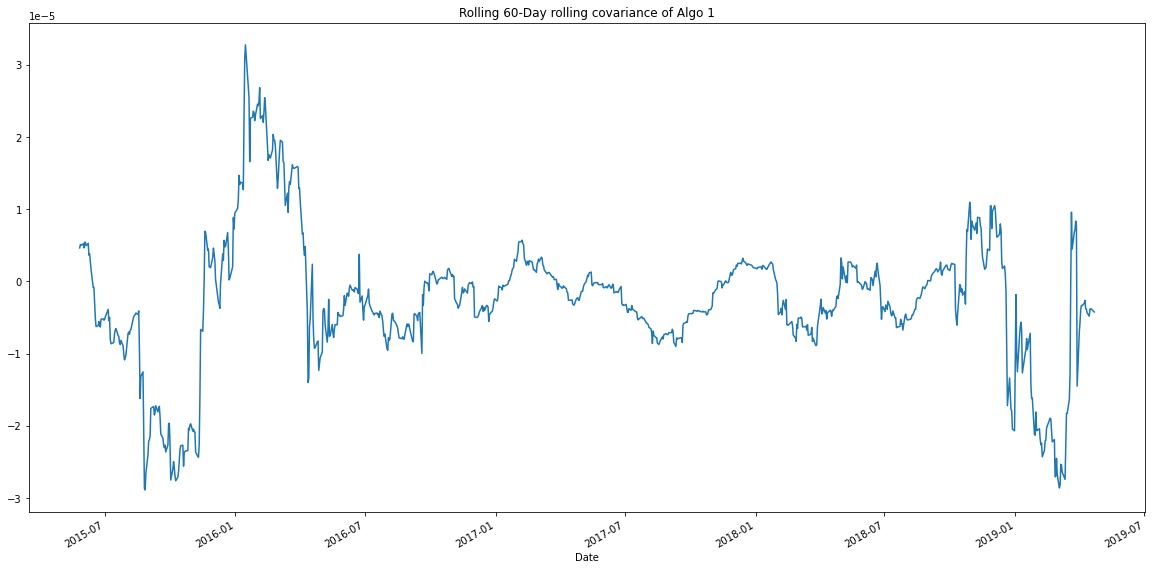

In [101]:
# Plot beta trend
# This will be done in a few parts. First - Calculate rolling covariance
algo1_rolling_covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P 500'])
algo1_rolling_covariance.plot(figsize=(20,10),title='Rolling 60-Day rolling covariance of Algo 1')

<AxesSubplot:title={'center':'Rolling 60-Day Beta of S&P 500'}, xlabel='Date'>

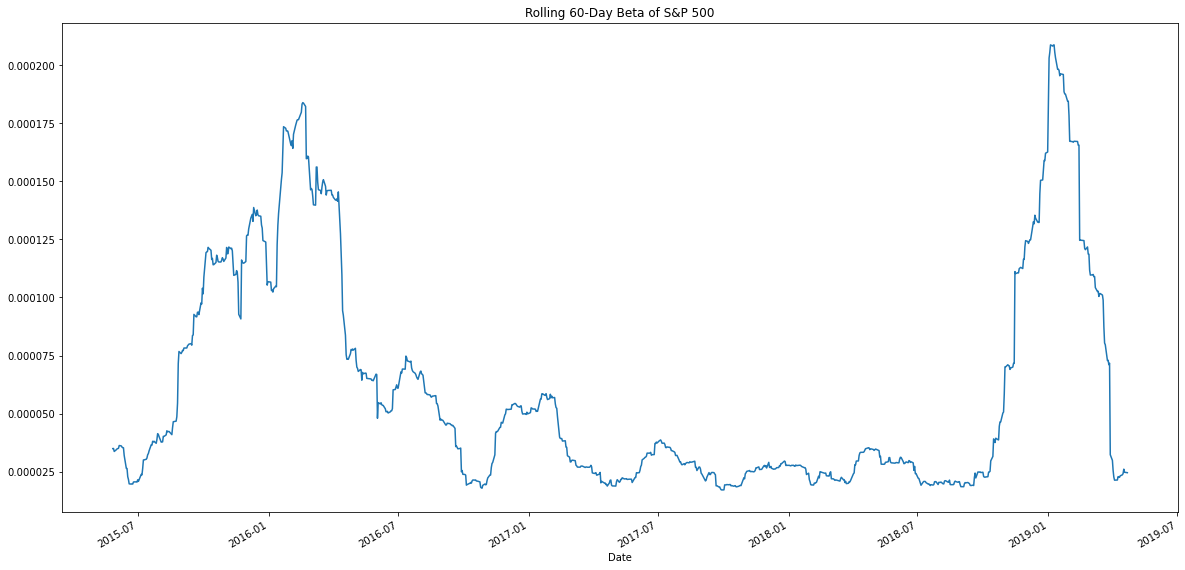

In [100]:
# Second - Calculate 60 day rolling beta rolling variance of S&P
rolling_variance = combined_df['Algo 1'].rolling(window=60).var()
rolling_variance.plot(figsize=(20,10), title='Rolling 60-Day Beta of S&P 500')

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

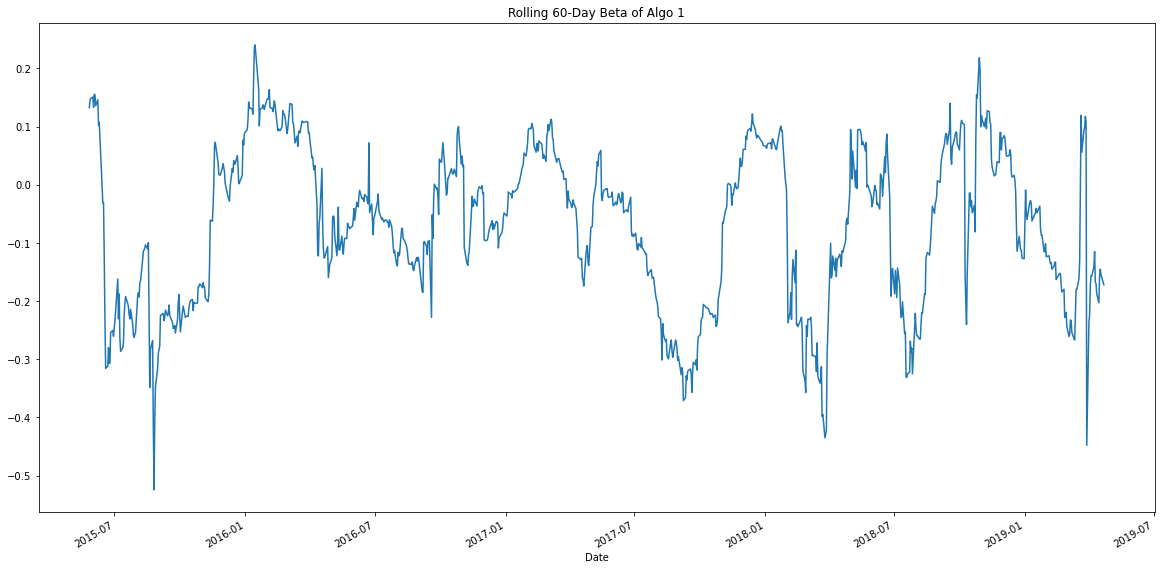

In [51]:
# Finally - Calculate 60-day rolling beta of Algo1
rolling_beta = algo1_rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

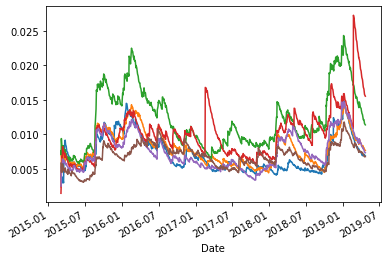

In [52]:
# Use `ewm` to calculate the rolling window
algo1_ewm = combined_df['Algo 1'].ewm(halflife=21).std()
algo2_ewm = combined_df['Algo 2'].ewm(halflife=21).std()
BH_ewm = combined_df['BERKSHIRE HATHAWAY INC'].ewm(halflife=21).std()
TGM_ewm = combined_df['TIGER GLOBAL MANAGEMENT LLC'].ewm(halflife=21).std()
SFM_ewm = combined_df['SOROS FUND MANAGEMENT LLC'].ewm(halflife=21).std()
PCC_ewm = combined_df['PAULSON & CO.INC. '].ewm(halflife=21).std()

algo1_ewm.plot()
algo2_ewm.plot()
BH_ewm.plot()
TGM_ewm.plot()
SFM_ewm.plot()
PCC_ewm.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [53]:
# Annualized Sharpe Ratios
# Firstly import the riskfree rate
rf_rate_path = Path("Resources/risk_free_rate.csv")
rf_rate_df = pd.read_csv(rf_rate_path)
# Set the date as the index
rf_rate_df = rf_rate_df.set_index(pd.to_datetime(rf_rate_df["Date"], infer_datetime_format=True))
# Drop the extra date column
rf_rate_df = rf_rate_df.drop(columns=["Date"])
rf_rate_df.head()

,rf_rate
Date,
2015-03-03,0.000002
2015-03-04,0.000001
2015-03-05,0.000002
2015-03-06,0.000001
2015-03-09,0.000002


In [54]:
# Concatenate returns into one df
combined2_df = pd.concat([combined_df,rf_rate_df], axis='columns', join='inner')
combined2_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,rf_rate
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.000002
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.000001
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.000002
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,0.000001
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.000002


In [55]:
sharpe_ratios = ((combined2_df.mean()-combined2_df['rf_rate'].mean()) * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

Algo 1                         1.139994
Algo 2                         0.297034
BERKSHIRE HATHAWAY INC         0.507142
PAULSON & CO.INC.             -0.710513
S&P 500                       -0.779607
SOROS FUND MANAGEMENT LLC      0.190466
TIGER GLOBAL MANAGEMENT LLC   -0.289959
rf_rate                             NaN
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

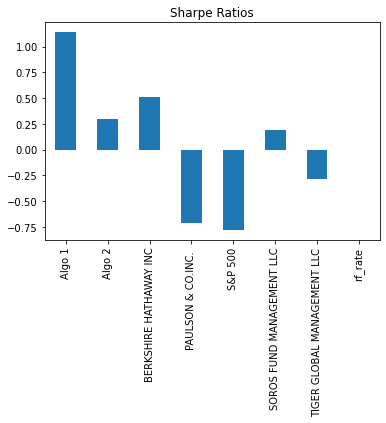

In [56]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on the sharpe ratios above, it shows that there is clear outperformance of the Algo 1 strategy over the whale portfolio. Sharpe ratios show risk adjusted returns and a higher sharpe ratio when comparing portfolios indicates that that the portfolio with the higher sharpe ratio has a higher rate of return for a given level of risk. The second algo portfolio (Algo 2) outperforms the S&P 500, however it doesn't outperform all the whales. It only outperforms Paulson & Co Inc, Soros Funds Management and Tiger Global Management. Berkshire Hathaway however outperforms the Algo 2 portfolio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [189]:
# Reading data from 1st stock - JP Morgan
jpm_path = Path("Resources/jpm_historical.csv")
jpm_df = pd.read_csv(jpm_path)
# Drop the unnecessary columns
jpm_df.drop(columns=['Volume','Open','High','Low'], inplace=True)
# Display a few colymns in the dataframe
jpm_df.head()

,Date,Close
0,3/03/2015 16:00,61.97
1,3/04/2015 16:00,62.13
2,3/05/2015 16:00,62.00
3,3/06/2015 16:00,60.89
4,3/09/2015 16:00,61.50


In [190]:
# Reading data from 2nd stock - NVIDIA Corporation
nvda_path = Path("Resources/nvda_historical.csv")
nvda_df = pd.read_csv(nvda_path)
# Drop the unnecessary columns
nvda_df.drop(columns=['Volume','Open','High','Low'], inplace=True)
# Display a few colymns in the dataframe
nvda_df.head()

,Date,Close
0,3/03/2015 16:00,5.55
1,3/04/2015 16:00,5.61
2,3/05/2015 16:00,5.72
3,3/06/2015 16:00,5.64
4,3/09/2015 16:00,5.65


In [191]:
# Reading data from 3rd stock - Johnson and Johnson
jnj_path = Path("Resources/jnj_historical.csv")
jnj_df = pd.read_csv(jnj_path)
# Drop the unnecessary columns
jnj_df.drop(columns=['Volume','Open','High','Low'], inplace=True)
# Display a few colymns in the dataframe
jnj_df.head()

,Date,Close
0,3/03/2015 16:00,102.34
1,3/04/2015 16:00,101.65
2,3/05/2015 16:00,102.52
3,3/06/2015 16:00,100.11
4,3/09/2015 16:00,100.66


In [192]:
# Combine all stocks in a single DataFrame
custom_combined = pd.concat([jpm_df, nvda_df, jnj_df], axis="columns", join="inner")
# Sort data in ascending order past to present
custom_combined.sort_index(inplace=True)
# Display few rows
custom_combined.head()

,Date,Close,Date,Close,Date,Close
0,3/03/2015 16:00,61.97,3/03/2015 16:00,5.55,3/03/2015 16:00,102.34
1,3/04/2015 16:00,62.13,3/04/2015 16:00,5.61,3/04/2015 16:00,101.65
2,3/05/2015 16:00,62.00,3/05/2015 16:00,5.72,3/05/2015 16:00,102.52
3,3/06/2015 16:00,60.89,3/06/2015 16:00,5.64,3/06/2015 16:00,100.11
4,3/09/2015 16:00,61.50,3/09/2015 16:00,5.65,3/09/2015 16:00,100.66


In [193]:
# Reset Date index
# Set the date as the index to the DataFrame
custom_combined = custom_combined.set_index(pd.to_datetime(jnj_df["Date"], infer_datetime_format=True)) 
# Drop the Date columns
custom_combined.drop(columns=['Date','Date','Date'], inplace=True)
custom_combined.head()

,Close,Close,Close
Date,,,
2015-03-03 16:00:00,61.97,5.55,102.34
2015-03-04 16:00:00,62.13,5.61,101.65
2015-03-05 16:00:00,62.00,5.72,102.52
2015-03-06 16:00:00,60.89,5.64,100.11
2015-03-09 16:00:00,61.50,5.65,100.66


In [194]:
# Normalise the date column using index normalise. This will remove the time from the dataset and allow for future comparison against the previous portfolios.
custom_combined.index = custom_combined.index.normalize()
custom_combined.head()

,Close,Close,Close
Date,,,
2015-03-03,61.97,5.55,102.34
2015-03-04,62.13,5.61,101.65
2015-03-05,62.00,5.72,102.52
2015-03-06,60.89,5.64,100.11
2015-03-09,61.50,5.65,100.66


In [195]:
# Reorganize portfolio data by having a column per symbol
columns = ['JPM','NVDA','JNJ']
custom_combined.columns = columns
custom_combined.head()

,JPM,NVDA,JNJ
Date,,,
2015-03-03,61.97,5.55,102.34
2015-03-04,62.13,5.61,101.65
2015-03-05,62.00,5.72,102.52
2015-03-06,60.89,5.64,100.11
2015-03-09,61.50,5.65,100.66


In [196]:
# Calculate daily returns
custom_daily_returns = custom_combined.pct_change()
# Drop NAs
custom_daily_returns = custom_daily_returns.dropna().copy()
custom_daily_returns.isnull().sum()

JPM     0
NVDA    0
JNJ     0
dtype: int64

In [197]:
# Display sample data
custom_daily_returns.head()

,JPM,NVDA,JNJ
Date,,,
2015-03-04,0.002582,0.010811,-0.006742
2015-03-05,-0.002092,0.019608,0.008559
2015-03-06,-0.017903,-0.013986,-0.023508
2015-03-09,0.010018,0.001773,0.005494
2015-03-10,-0.025041,0.017699,-0.011226


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [198]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
cus_portfolio_returns = custom_daily_returns.dot(weights)
# Display sample data
cus_portfolio_returns.head()

Date
2015-03-04    0.002217
2015-03-05    0.008691
2015-03-06   -0.018466
2015-03-09    0.005762
2015-03-10   -0.006189
dtype: float64

In [199]:
cus_portfolio_returns.isnull().sum()

0

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [200]:
# Join your returns DataFrame to the original returns DataFrame
cus_combined_df = pd.concat([combined2_df,cus_portfolio_returns], axis='columns', join='inner')
cus_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,rf_rate,0
Date,,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.000001,0.002217
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.000002,0.008691
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,0.000001,-0.018466
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.000002,0.005762
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,0.000002,-0.006189


In [201]:
columns = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','S&P 500','RF rate','Harolds Portfolio']
cus_combined_df.columns = columns
cus_combined_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,RF rate,Harolds Portfolio
Date,,,,,,,,,
2019-04-12,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,0.000630,0.000266,0.014810
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.000264,-0.011746
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000264,0.013459
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.000266,0.009179
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.000263,-0.006565


In [202]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
cus_combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
RF rate                        0
Harolds Portfolio              0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [203]:
# Calculate the annualized `std`
harold_annualised_STD = cus_portfolio_returns *np.sqrt(252)
harold_annualised_STD.head()

Date
2015-03-04    0.035191
2015-03-05    0.137972
2015-03-06   -0.293133
2015-03-09    0.091464
2015-03-10   -0.098250
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation of Harolds Portfolio'}, xlabel='Date'>

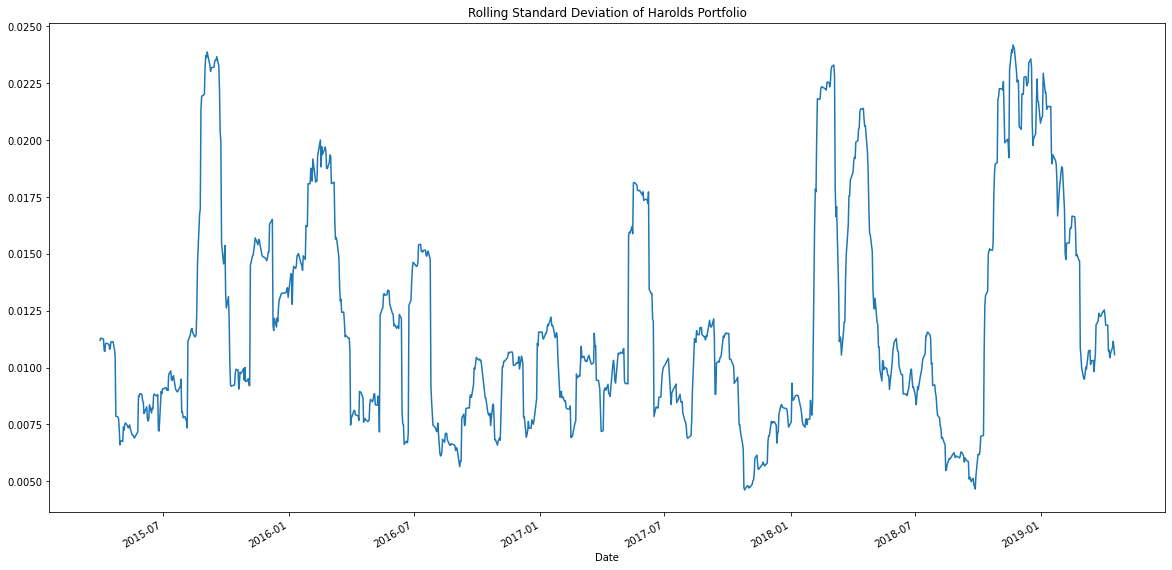

In [204]:
# Calculate rolling standard deviation
harold_rolling_std = cus_combined_df['Harolds Portfolio'].rolling(window=21).std()

# Plot rolling standard deviation
harold_rolling_std.plot(figsize=(20,10),title='Rolling Standard Deviation of Harolds Portfolio')

### Calculate and plot the correlation

In [214]:
# Calculate and plot the correlation
all_portfolio_correlation = cus_combined_df.corr()
# Display de correlation matrix
all_portfolio_correlation.loc['S&P 500','Harolds Portfolio']

-0.004504094144810559

<AxesSubplot:>

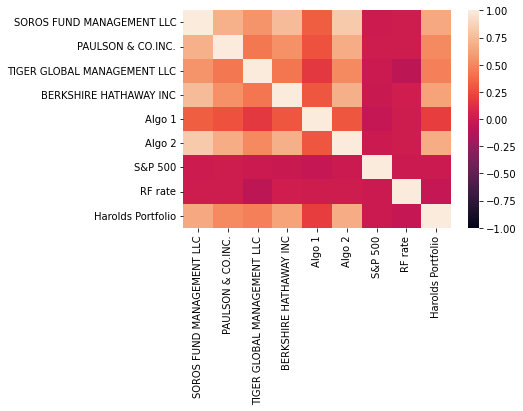

In [215]:
# Display de correlation matrix
sns.heatmap(all_portfolio_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

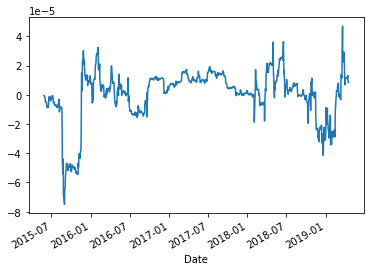

In [205]:
# Calculate 60-day rolling covariance of Harold's Portfolio
harold_rolling_covariance = cus_combined_df['Harolds Portfolio'].rolling(window=60).cov(cus_combined_df['S&P 500'])
harold_rolling_covariance.plot()

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P 500 Returns'}, xlabel='Date'>

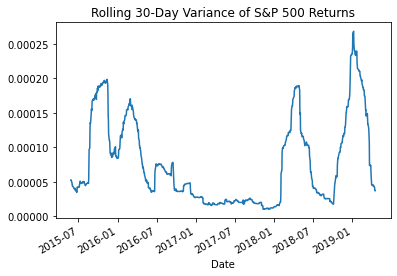

In [206]:
# Calculate the 60-day rolling variance of S&P 500
sp_rolling_variance = cus_combined_df['S&P 500'].rolling(window=60).var()
sp_rolling_variance.plot(title='Rolling 30-Day Variance of S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Harolds Portfolio'}, xlabel='Date', ylabel='Beta'>

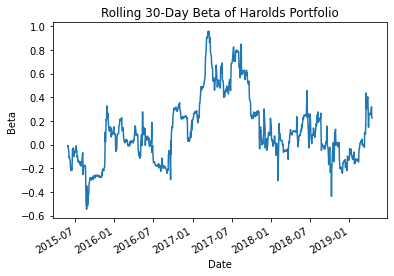

In [217]:
# Calculate rolling beta by dividing rolling cov by S&P 500 rolling var
rolling_beta = harold_rolling_covariance / sp_rolling_variance
rolling_beta.plot(title='Rolling 30-Day Beta of Harolds Portfolio',ylabel='Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [208]:
# Calculate Annualized Sharpe Ratios
cus_sharpe_ratios = ((cus_combined_df.mean()-cus_combined_df['RF rate'].mean()) * 252) / (cus_combined_df.std() * np.sqrt(252))
cus_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.198612
PAULSON & CO.INC.             -0.684239
TIGER GLOBAL MANAGEMENT LLC   -0.283740
BERKSHIRE HATHAWAY INC         0.516308
Algo 1                         1.143064
Algo 2                         0.303369
S&P 500                       -0.772173
RF rate                        0.000000
Harolds Portfolio              1.227121
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

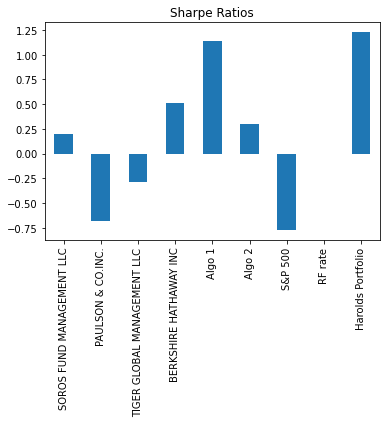

In [209]:
# Visualize the sharpe ratios as a bar plot
cus_sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### How does your portfolio do?

Harold's portfolio has a better sharpe ratio than all other portfolios including the Algo 1 portfolio. Sharpe ratio adjusts the returns based on the risk of the portfolio (i.e the standard deviation). As Harold's portfolio has the highest sharpe ratio, it shows the portfolio has the most return per "unit" of risk. 